In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [9]:
df.shape

(244, 7)

In [10]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
num_features=[feature for feature in df.columns if df[feature].dtypes!='category']

In [14]:
len(num_features)

3

In [15]:
num_features

['total_bill', 'tip', 'size']

In [16]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=='category']

In [17]:
len(cat_features)

4

In [18]:
cat_features

['sex', 'smoker', 'day', 'time']

In [19]:
for feature in cat_features:
    print("the value counts in the feature {} are ".format(feature))
    print(df[feature].value_counts())
    print('+'*50)
    print(f'the categories present in the {feature} are : ')
    print(df[feature].unique())
    print('='*100)
    print('\n')
    print('\n')
    

the value counts in the feature sex are 
sex
Male      157
Female     86
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
the categories present in the sex are : 
['Female', 'Male']
Categories (2, object): ['Male', 'Female']




the value counts in the feature smoker are 
smoker
No     151
Yes     92
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
the categories present in the smoker are : 
['No', 'Yes']
Categories (2, object): ['Yes', 'No']




the value counts in the feature day are 
day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
the categories present in the day are : 
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']




the value counts in the feature time are 
time
Dinner    176
Lunch      67
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
the categories present in the time are : 
['Di

In [20]:
df[cat_features].describe()

,sex,smoker,day,time
count,243,243,243,243
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


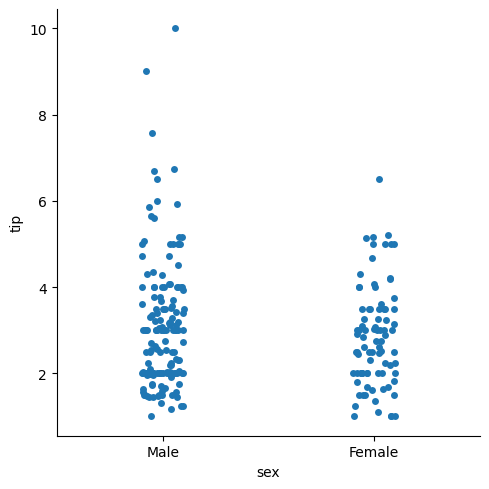

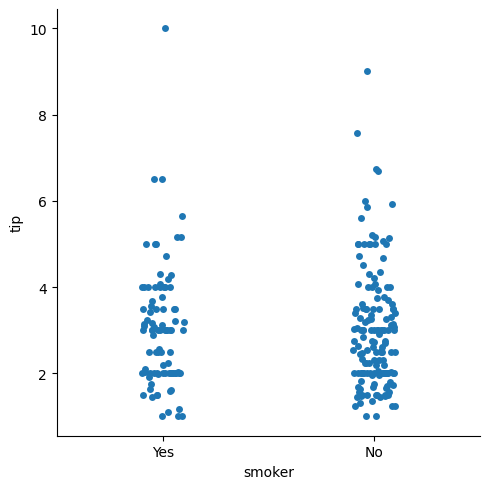

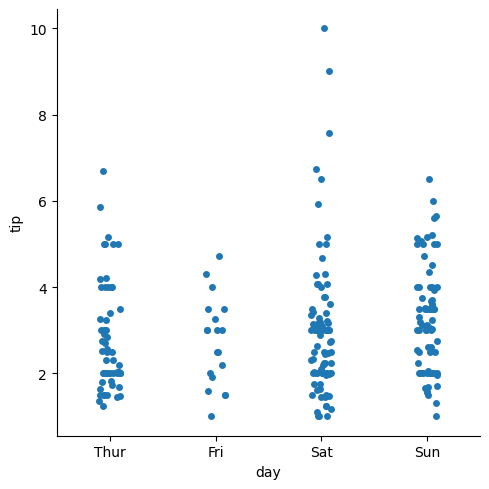

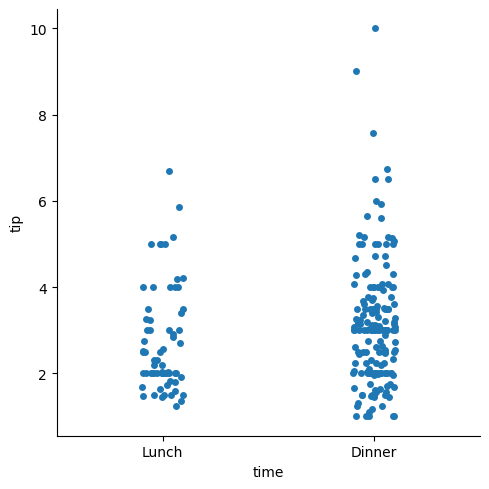

In [21]:
for i in cat_features:
    sns.catplot(data=df,x=i,y='tip')
    

C:\Users\kms\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kms\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


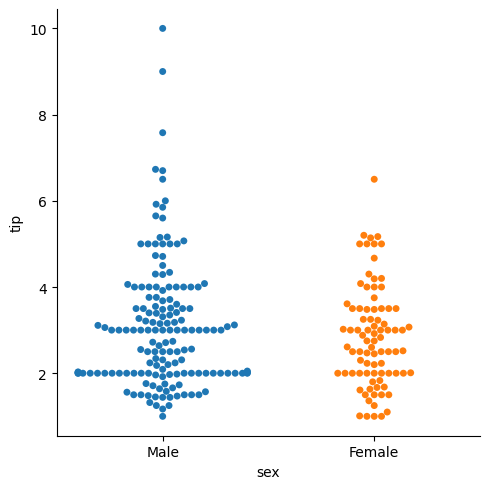

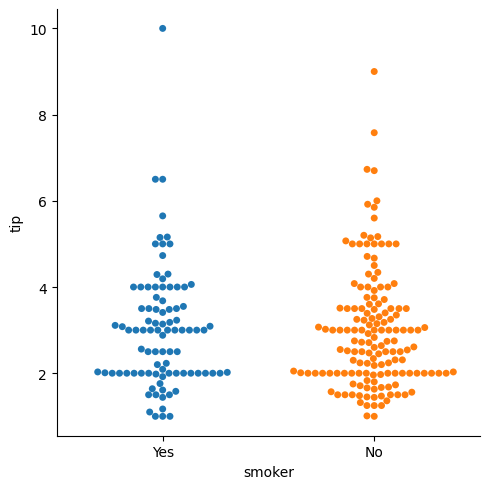

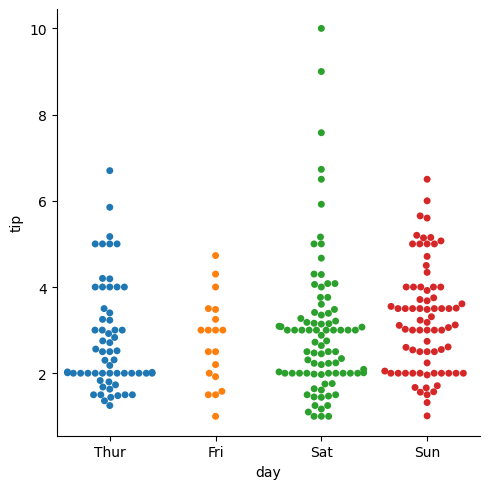

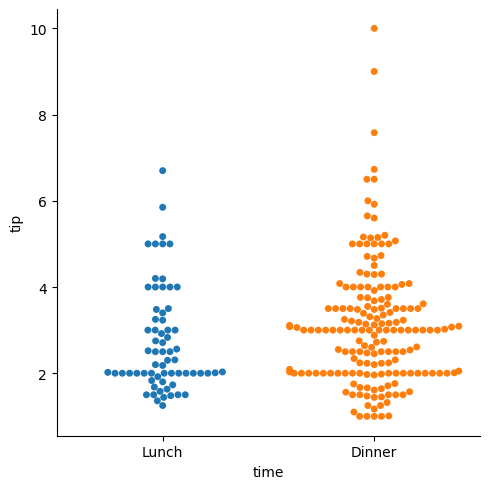

In [22]:
for i in cat_features:
    sns.catplot(data=df,x=i,y='tip',kind='swarm',hue=i)

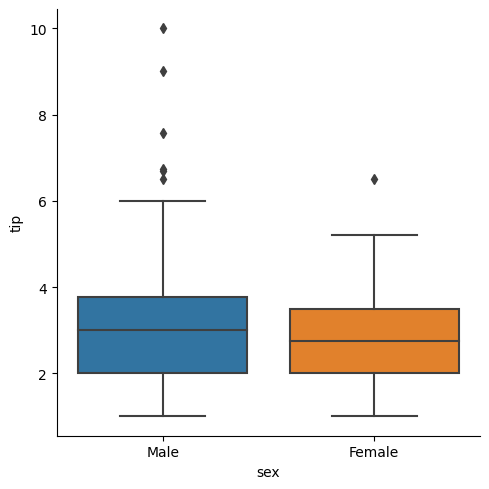

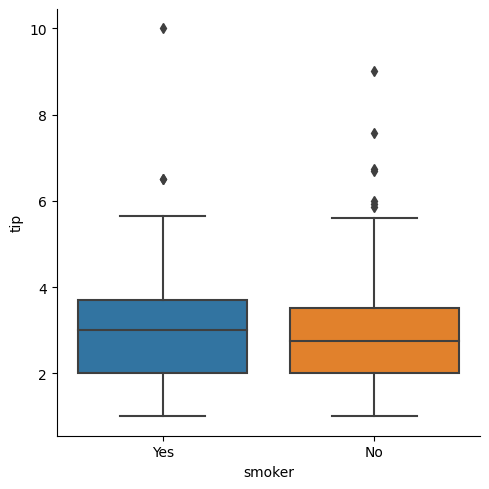

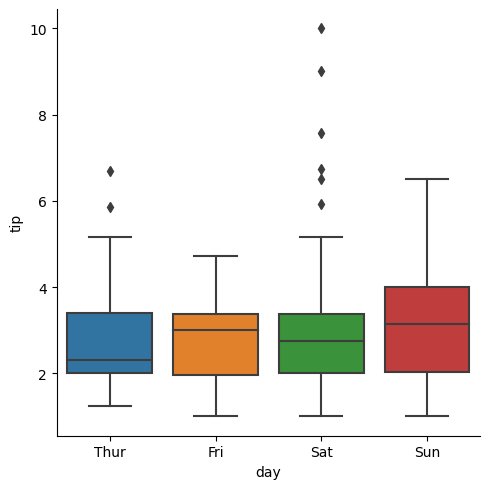

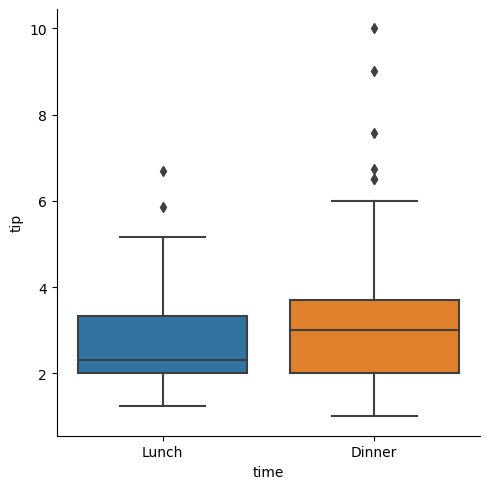

In [23]:

for i in cat_features:
    sns.catplot(data=df,x=i,y='tip',kind='box')

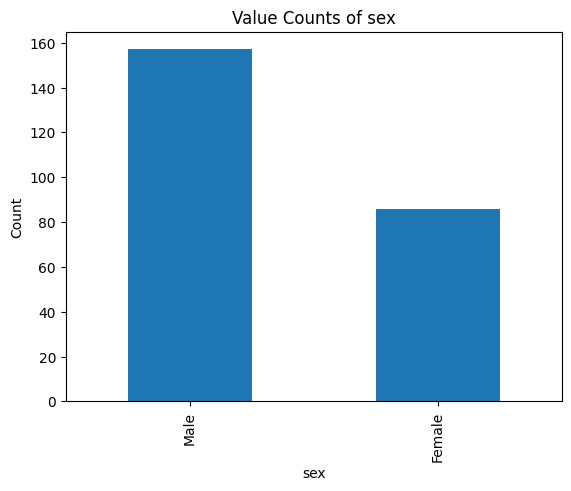

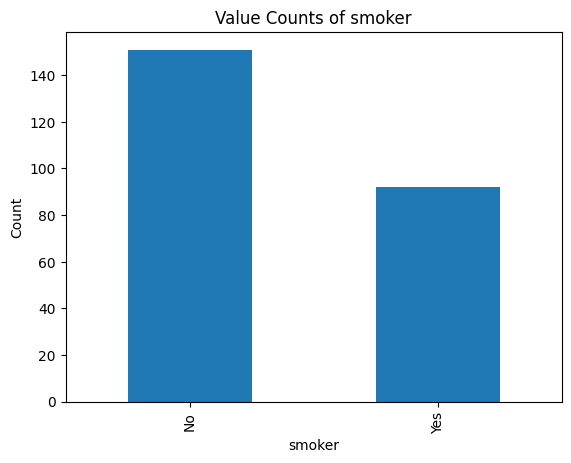

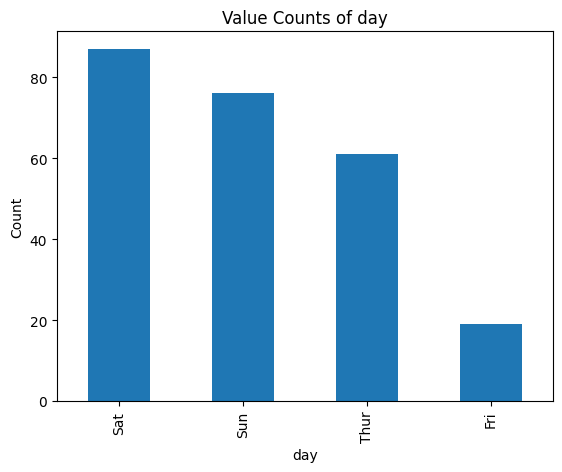

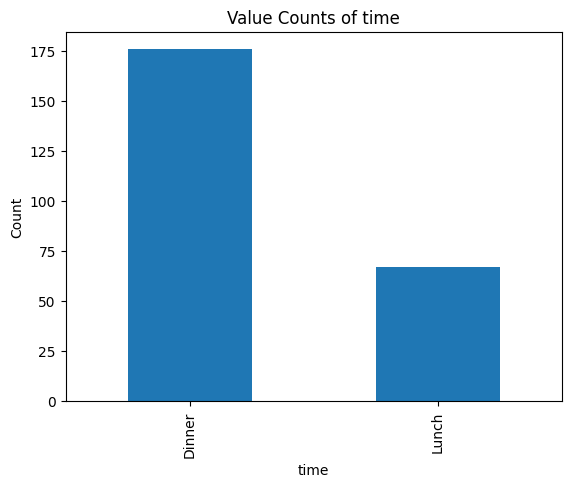

In [24]:
for column in cat_features:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [25]:
# cross tab


In [26]:
cross_tab=pd.crosstab(df['sex'],df['smoker'])

<Figure size 640x480 with 0 Axes>

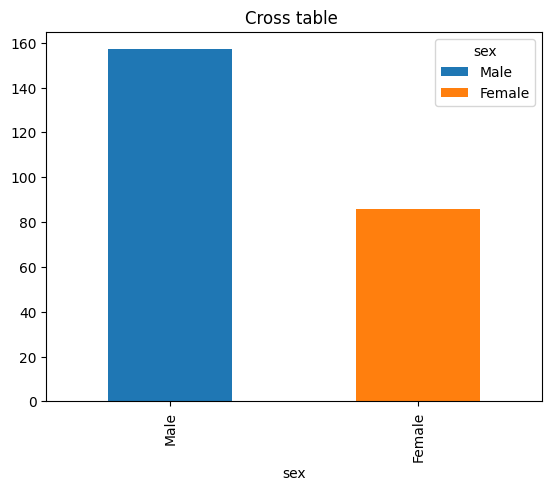

<Figure size 640x480 with 0 Axes>

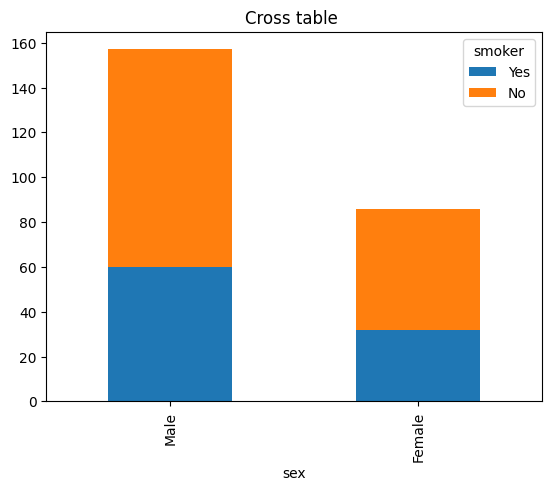

<Figure size 640x480 with 0 Axes>

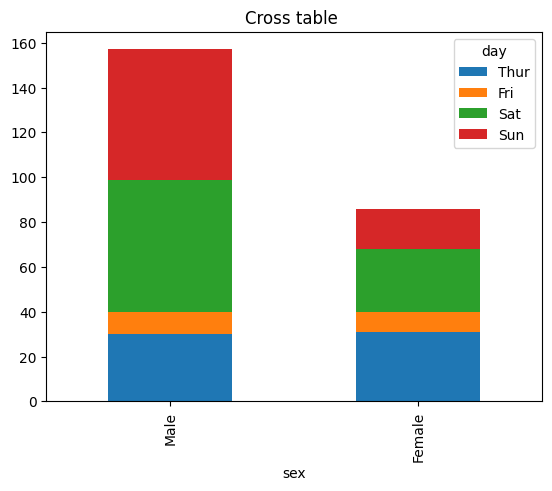

<Figure size 640x480 with 0 Axes>

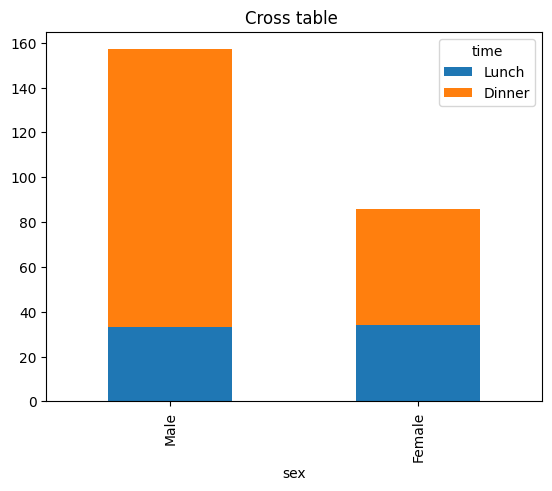

<Figure size 640x480 with 0 Axes>

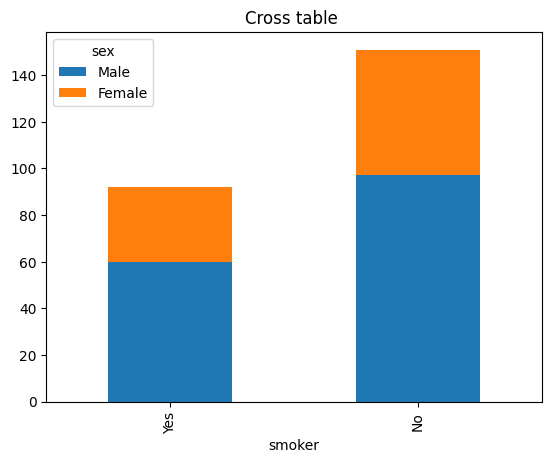

<Figure size 640x480 with 0 Axes>

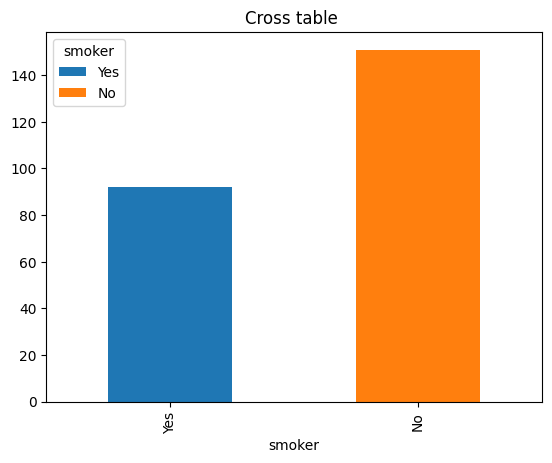

<Figure size 640x480 with 0 Axes>

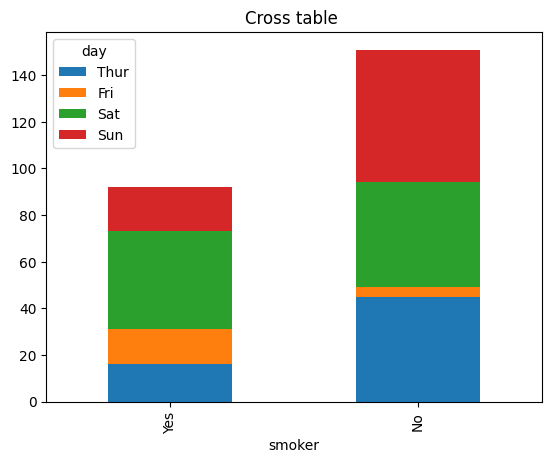

<Figure size 640x480 with 0 Axes>

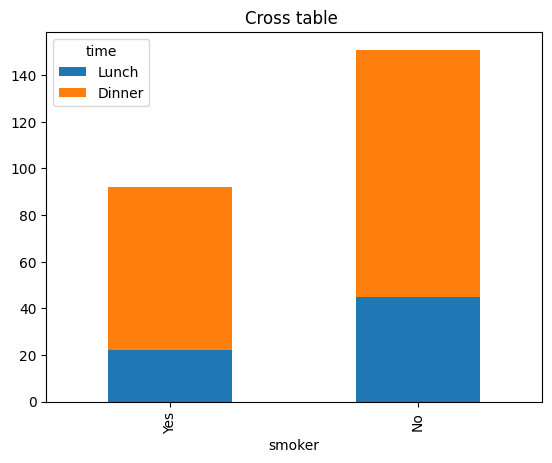

<Figure size 640x480 with 0 Axes>

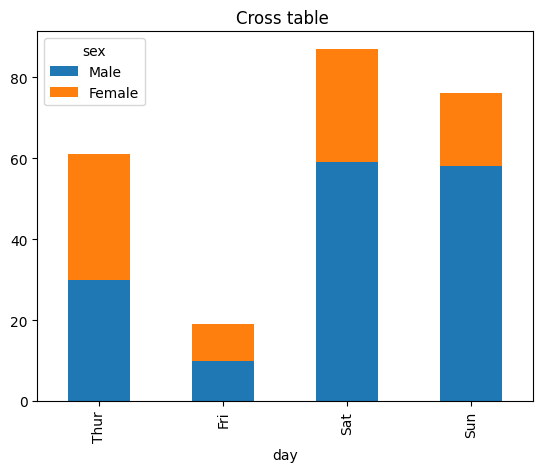

<Figure size 640x480 with 0 Axes>

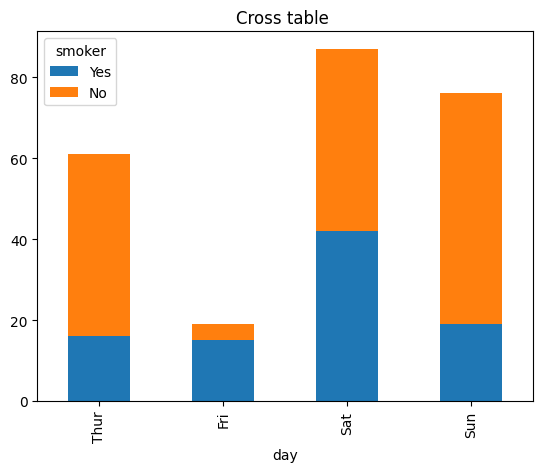

<Figure size 640x480 with 0 Axes>

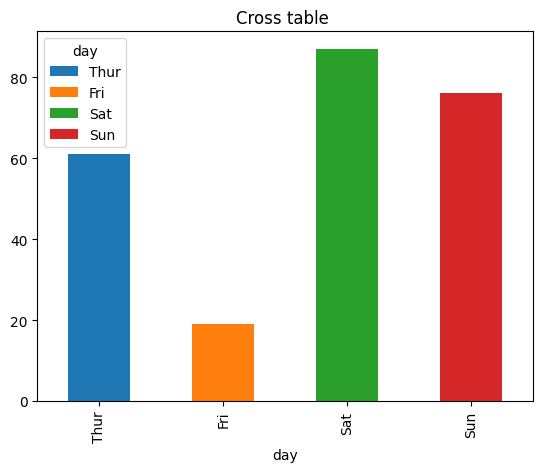

<Figure size 640x480 with 0 Axes>

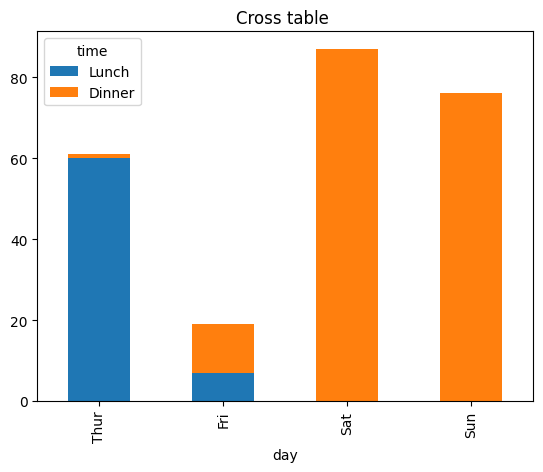

<Figure size 640x480 with 0 Axes>

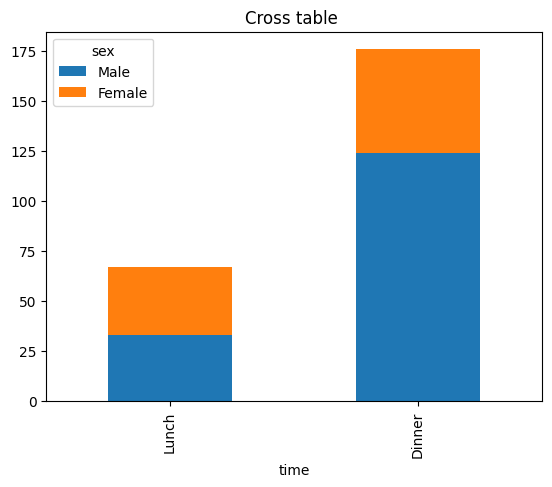

<Figure size 640x480 with 0 Axes>

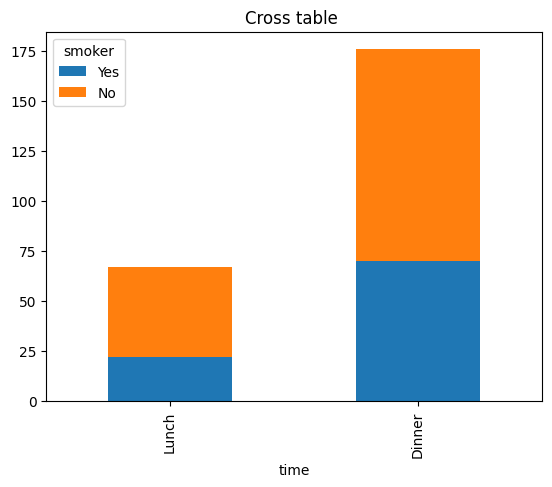

<Figure size 640x480 with 0 Axes>

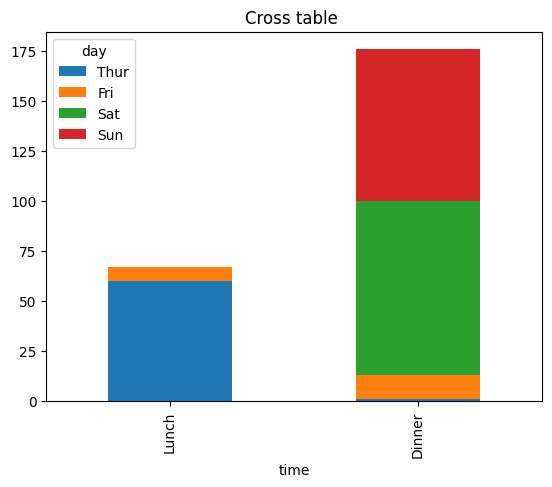

<Figure size 640x480 with 0 Axes>

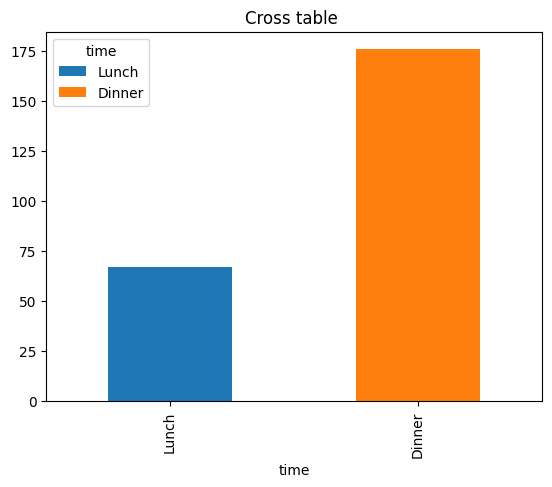

In [27]:
i=1
for i in range(len(cat_features)):
    cat1=cat_features[i]
    j=i+1
    for j in range(len(cat_features)):
        cat2=cat_features[j]
        cross_tab=pd.crosstab(df[cat1],df[cat2])
        plt.figure()
        cross_tab.plot(kind='bar',stacked=True)
        plt.title('Cross table ')
        plt.show()
        
        
        

In [28]:
cat_features

['sex', 'smoker', 'day', 'time']

In [29]:
contingency_table=pd.crosstab(df['sex'],df['smoker'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print('chi-square statistics ',chi2)
print('p-value',p_value)
print('degree of freedom',dof)
print('Expected frequencies ',expected)

chi-square statistics  0.0002723826242717228
p-value 0.9868322962834231
degree of freedom 1
Expected frequencies  [[59.44032922 97.55967078]
 [32.55967078 53.44032922]]


In [30]:
cross_tab

time,Lunch,Dinner
time,,
Lunch,67,0
Dinner,0,176


In [31]:
expected

array([[59.44032922, 97.55967078],
       [32.55967078, 53.44032922]])

In [32]:
# if expected and observed value is having less difference that means they have weaker relationship between them 
# reject null hypothesis case
# p-value<significance level
# chi-square value > critical value 

In [33]:
df.query('smoker=="yes"')

,total_bill,tip,sex,smoker,day,time,size


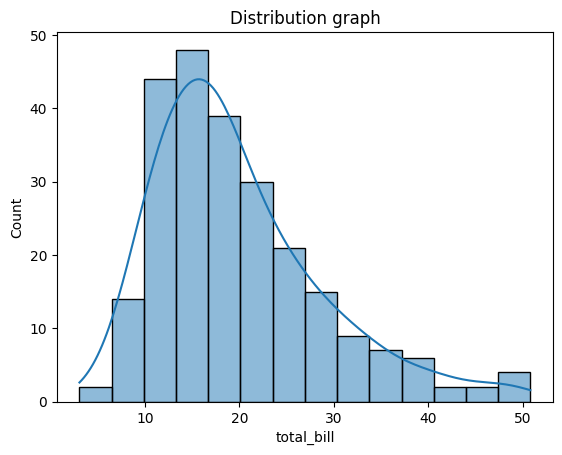

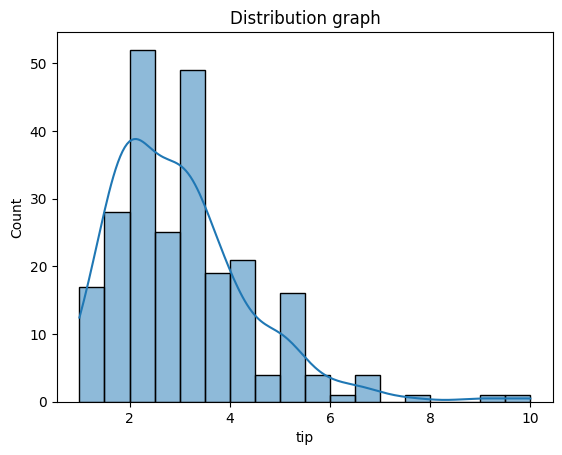

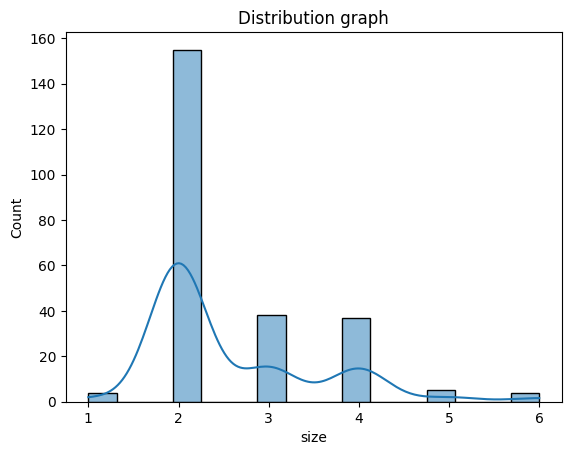

In [34]:
for i in num_features:
    plt.figure()
    sns.histplot(data=df,x=i,kde=True)
    plt.title('Distribution graph')
    plt.show()

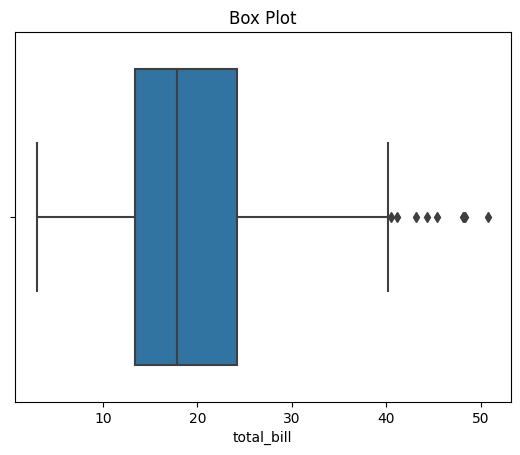

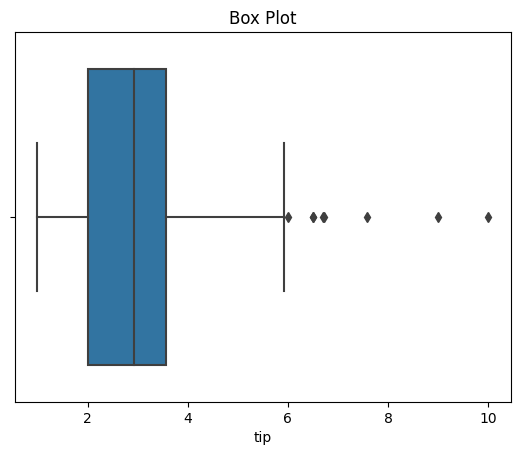

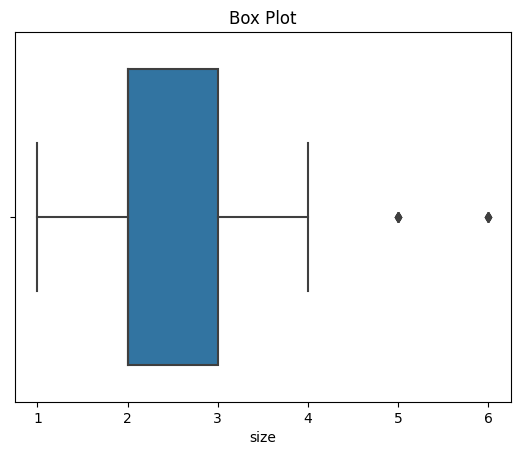

In [35]:
for i in num_features:
    plt.figure()
    sns.boxplot(data=df,x=i)
    plt.title('Box Plot')
    plt.show()

In [36]:
df[num_features].corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


<Axes: >

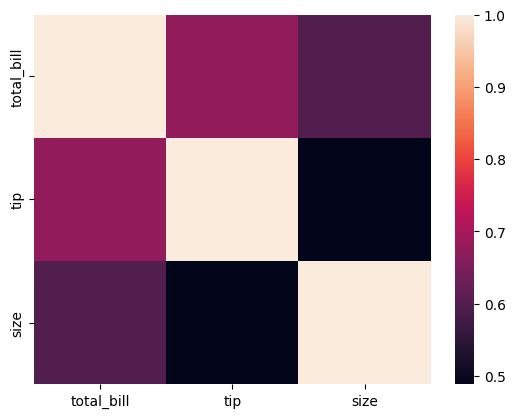

In [37]:
sns.heatmap(df[num_features].corr())

In [38]:
X=df.drop(['tip'],axis=1)
y=df[['tip']]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
num_features=[feature for feature in X.columns if X[feature].dtypes!='category']

In [41]:
num_features

['total_bill', 'size']

In [42]:
cat_features=[feature for feature in X.columns if X[feature].dtypes=='category']

In [43]:
cat_features

['sex', 'smoker', 'day', 'time']

In [44]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

In [45]:
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder())
    ]
)

In [46]:
preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,num_features),
        ('cat_pipeline',cat_pipeline,cat_features)
    ]
)

In [47]:
X_train

,total_bill,sex,smoker,day,time,size
115,17.31,Female,No,Sun,Dinner,2
208,24.27,Male,Yes,Sat,Dinner,2
158,13.39,Female,No,Sun,Dinner,2
132,11.17,Female,No,Thur,Lunch,2
84,15.98,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...
106,20.49,Male,Yes,Sat,Dinner,2
14,14.83,Female,No,Sun,Dinner,2
92,5.75,Female,Yes,Fri,Dinner,2
179,34.63,Male,Yes,Sun,Dinner,2


In [48]:
X_train=preprocessor.fit_transform(X_train)

In [49]:
X_train[0]

array([-0.31281158, -0.63021145,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ])

In [50]:
X_test=preprocessor.transform(X_test)

In [51]:
X_test[0]

array([-0.02501807, -0.63021145,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ])

In [52]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'svm':SVR(),
    'DecesionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor()
}

In [53]:
params={
    'LinearRegression':{
        
    },
    
}

In [54]:
def adj_r2_score(true,predicted,n_features):
    r2=r2_score(true,predicted)
    adj_r2=1-((1-r2)*len(true)-1)/(len(true)-n_features-1)
    return adj_r2

In [55]:
def evaluate_model(true,predicted,n_features):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    adj_r2_square=adj_r2_score(true,predicted,n_features)
    return mae,mse,rmse,r2_square,adj_r2_square

In [56]:
model_list=[]
r2_list=[]
model_report={}

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    #make predictions 
    y_pred=model.predict(X_test)
    mae,mse,rmse,r2_square,adj_r2_square=evaluate_model(y_pred,y_test,X_train.shape[1])
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    model_report[list(models.keys())[i]]=r2_square
    print('Model Training performance')
    print('Model Traing Performance')
    print("RMSE              :",rmse)
    print("MAE               :",mae)
    print("MSE               :",mse)
    print("R2 Score          :",r2_square)
    print("Adjusted R2 Score :",adj_r2_square)
    print('The score of the model is : ',model.score(X_test,y_test))
   
    
    r2_list.append(r2_square)
    print('='*50)
    print('\n')
    

LinearRegression
Model Training performance
Model Traing Performance
RMSE              : 1.0830525484338163
MAE               : 0.7665074194589581
MSE               : 1.1730028226689841
R2 Score          : -0.3738984425679299
Adjusted R2 Score : -0.8422506579396822
The score of the model is :  0.5185656337107006


Lasso
Model Training performance
Model Traing Performance
RMSE              : 1.5692779114182758
MAE               : 1.148265306122449
MSE               : 2.4626331632653056
R2 Score          : 0.0
Adjusted R2 Score : -0.33333333333333326
The score of the model is :  -0.010736047217692724


Ridge
Model Training performance
Model Traing Performance
RMSE              : 1.083735345504253
MAE               : 0.7673443321841761
MSE               : 1.1744822990952226
R2 Score          : -0.38877126147498653
Adjusted R2 Score : -0.8624942170076204
The score of the model is :  0.5179584136921798


ElasticNet
Model Training performance
Model Traing Performance
RMSE              : 1.37

C:\Users\kms\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kms\AppData\Local\Temp\ipykernel_13040\1797674398.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForest
Model Training performance
Model Traing Performance
RMSE              : 1.0815735490667366
MAE               : 0.783244897959184
MSE               : 1.1698013420408164
R2 Score          : -0.2483962736759755
Adjusted R2 Score : -0.6714282613922999
The score of the model is :  0.5198796141782858




In [57]:
model_report

{'LinearRegression': -0.3738984425679299,
 'Lasso': 0.0,
 'Ridge': -0.38877126147498653,
 'ElasticNet': -25.136517428511972,
 'svm': -0.8998437995722348,
 'DecesionTree': 0.44299009158990654,
 'RandomForest': -0.2483962736759755}

In [58]:
best_model_score=max(model_report.values())

In [59]:
best_model_score

0.44299009158990654

In [72]:
best_model_name=list(model_report.keys())[list(model_report.values()).index(best_model_score)]

In [73]:

best_model=models[best_model_name]

In [81]:
best_model.predict([[-0.31281158, -0.63021145,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ]])

array([3.5])

In [83]:
best_model.score(X_train,y_train)

C:\Users\kms\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Female'